# Ch06-2 k-평균

실제로 비지도학습은 무슨 사진인지 모르는 상태로 clustering을 해야함  

방법은?  **k-평균 군집 알고리즘**으로 평균값을 자동으로 찾기  
- 평균값이 클러스터의 중심에 위치하므로 **클러스터 중심(cluster center)** 또는 **센트로이드(Centroid)**




## 1. k-평균 알고리즘 소개  

### k-평균 알고리즘의 작동 방식

1. 무작위로 k개의 클러스터 중심을 정함  
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정  
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경  
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복  
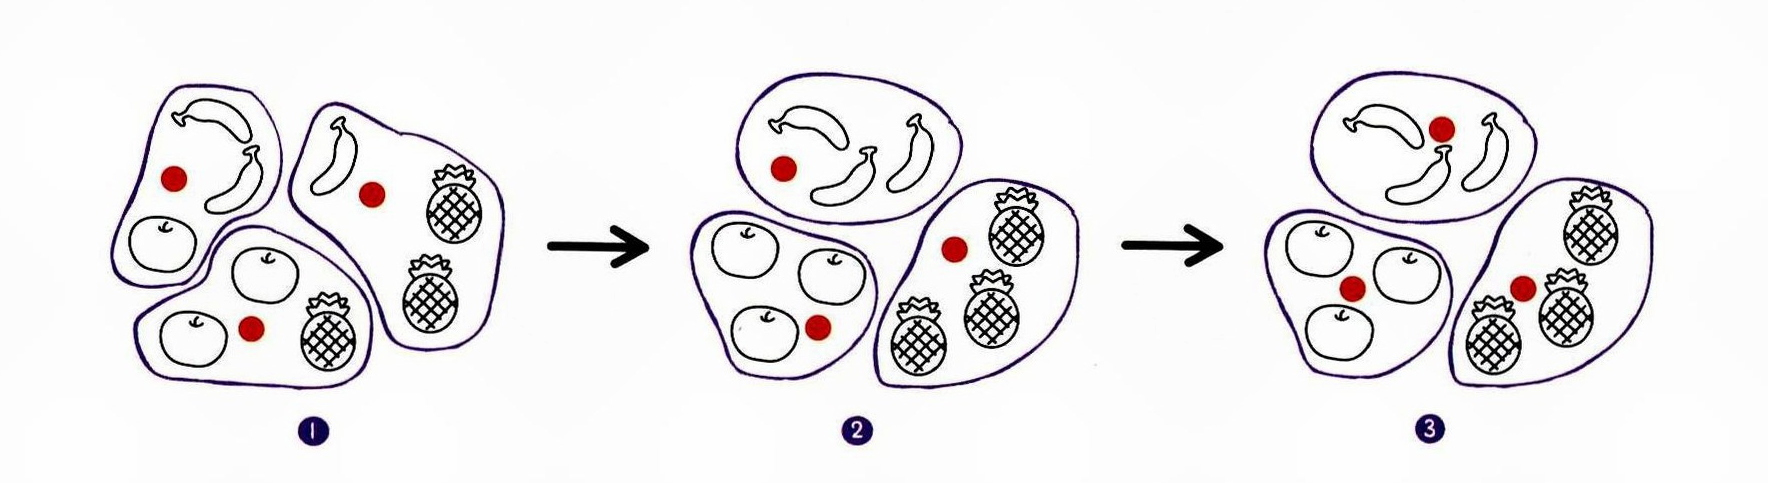

[1] 먼저 3개의 클러스터 중심(빨간 점)을 랜덤하게 지정  
    클러스터 중심에서 가장 가까운 샘플울 하나의 클러스터로 묶음  
    왼쪽 위부터 시계방향으로 바나나 2개와 사과 1개 클러스터 / 바나나 1개와 파인애플 2개 클러스터 / 사과 2개와 파인애플 1개 클러스터 만듦  

[2] 다시 클러스터 중심을 계산한 다음 가장 가까운 샘플들을 클러스터로 묶음

[3] 그 클러스터에서 중심을 다시 찍음 반복

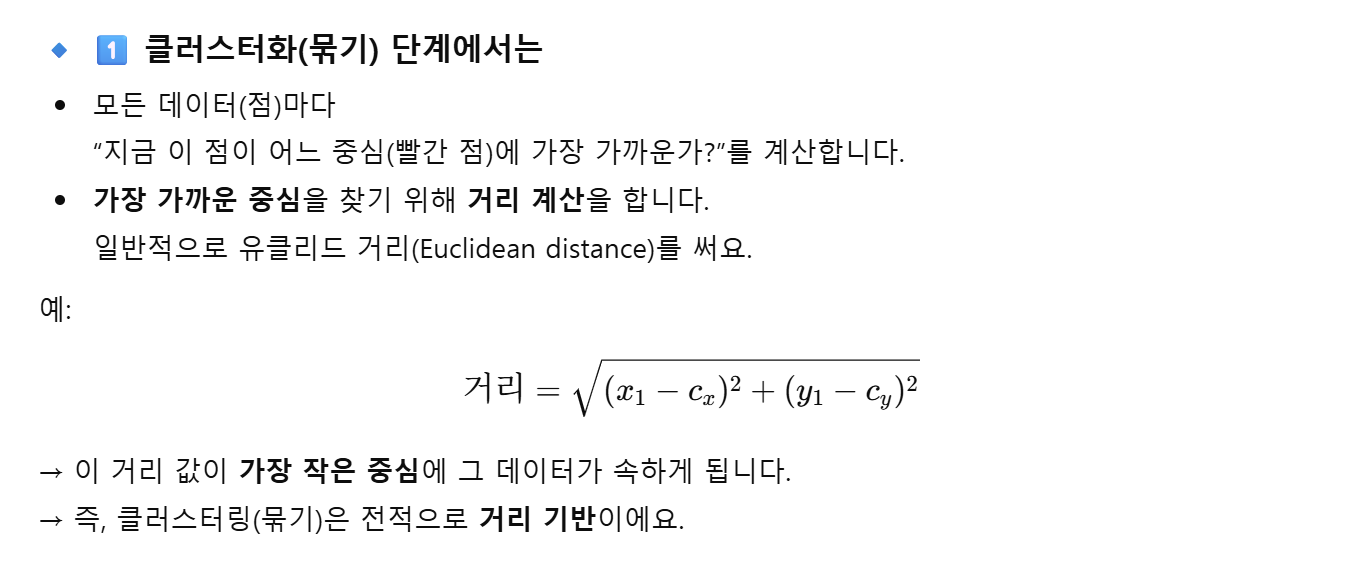
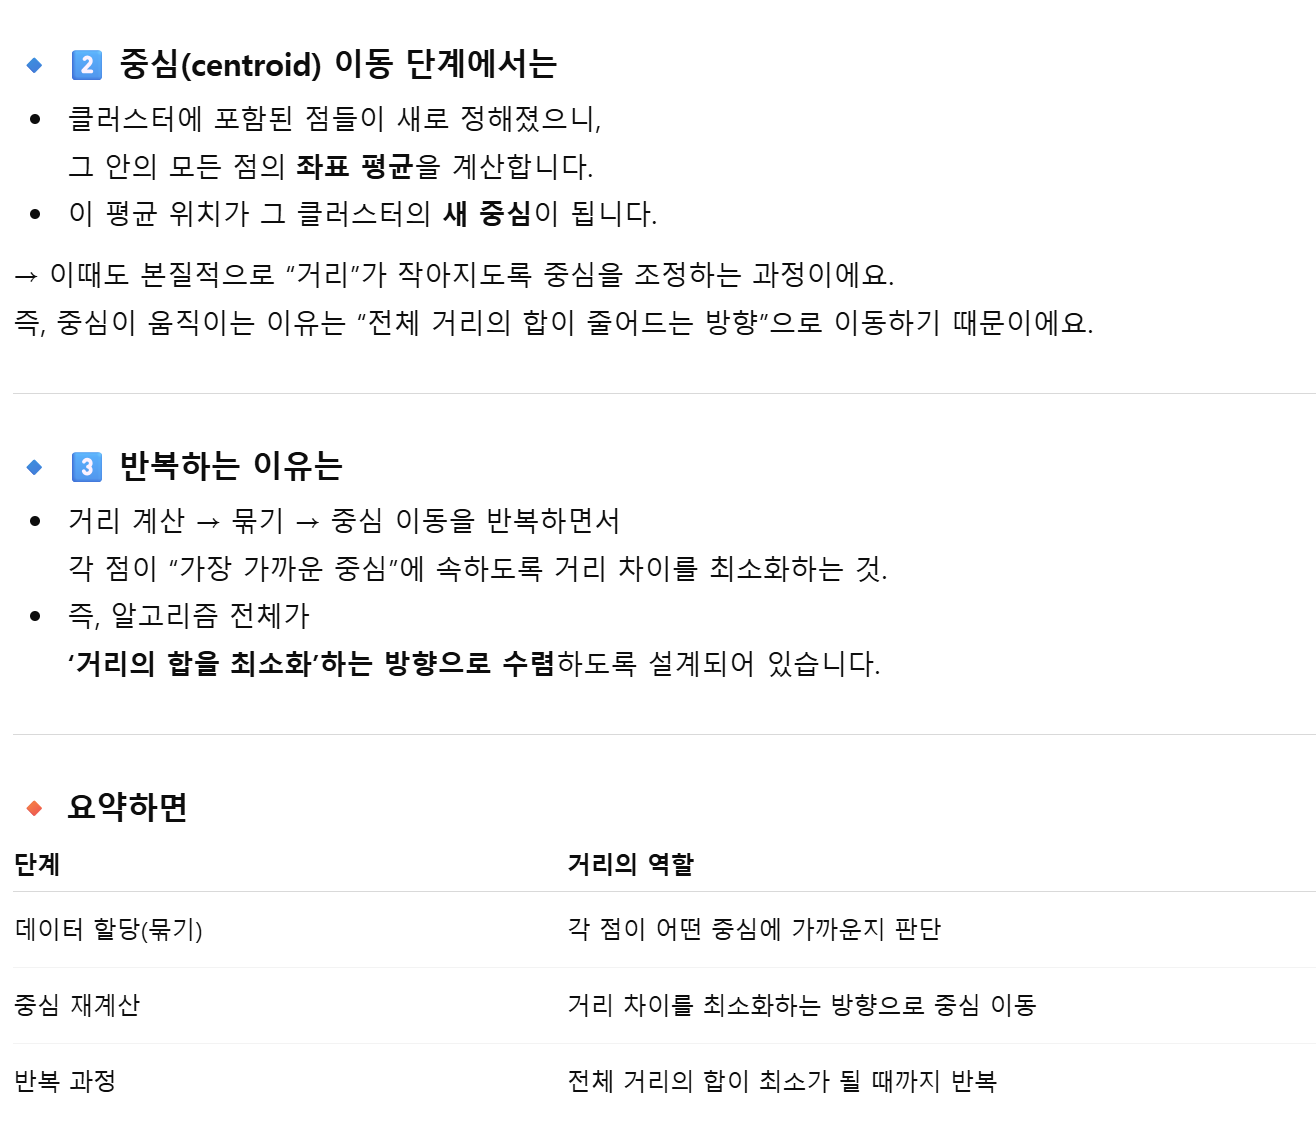
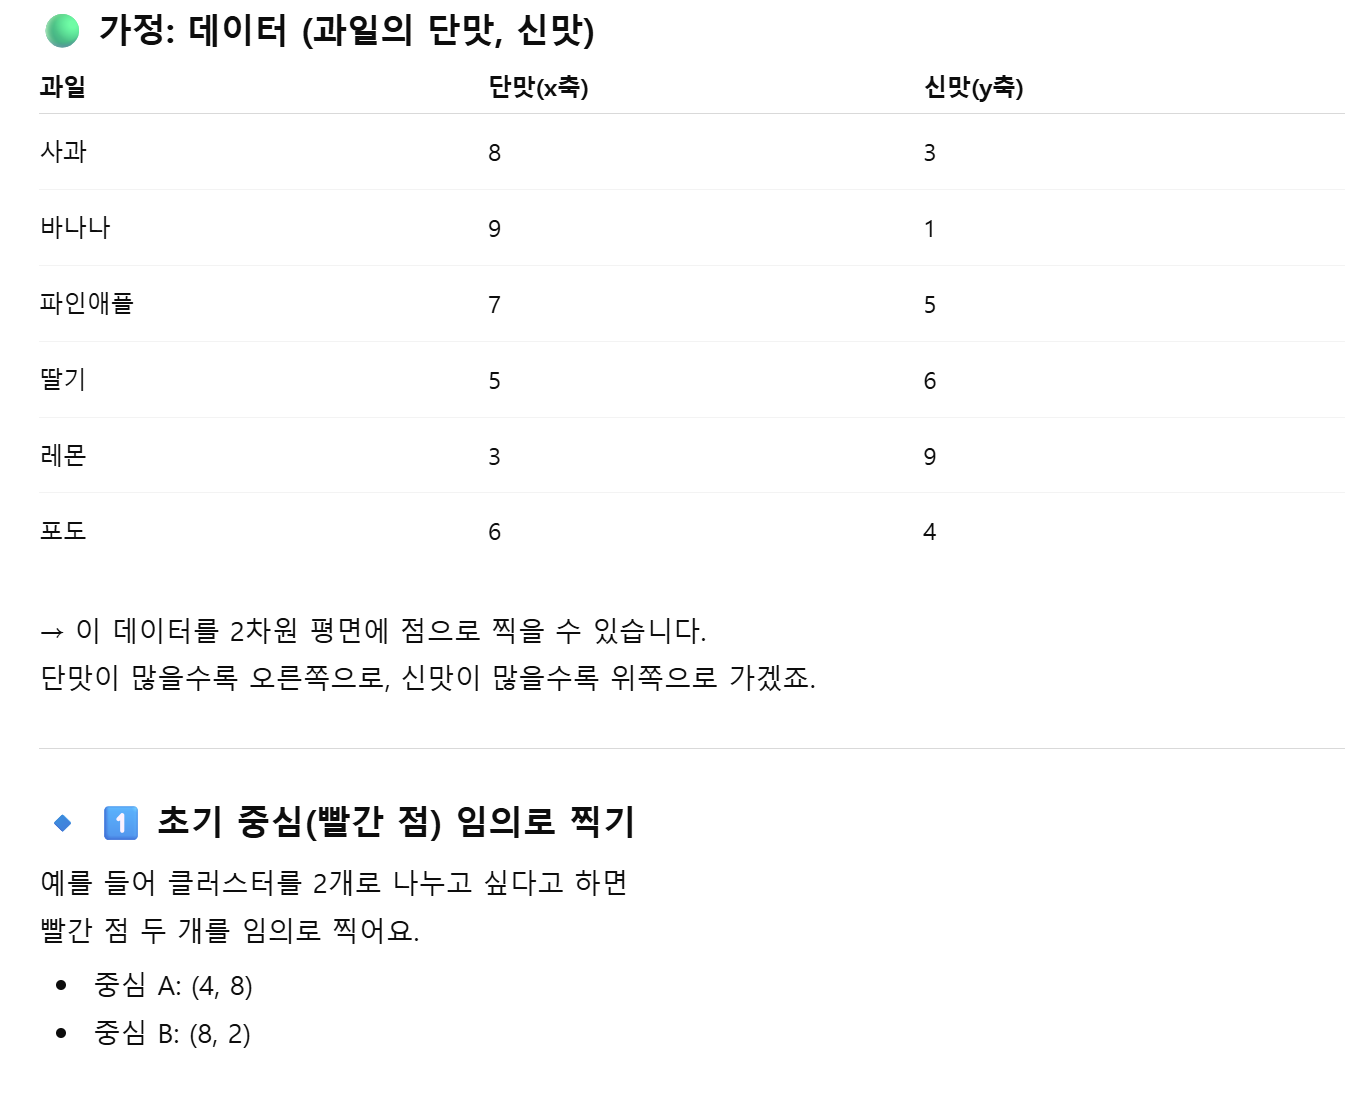
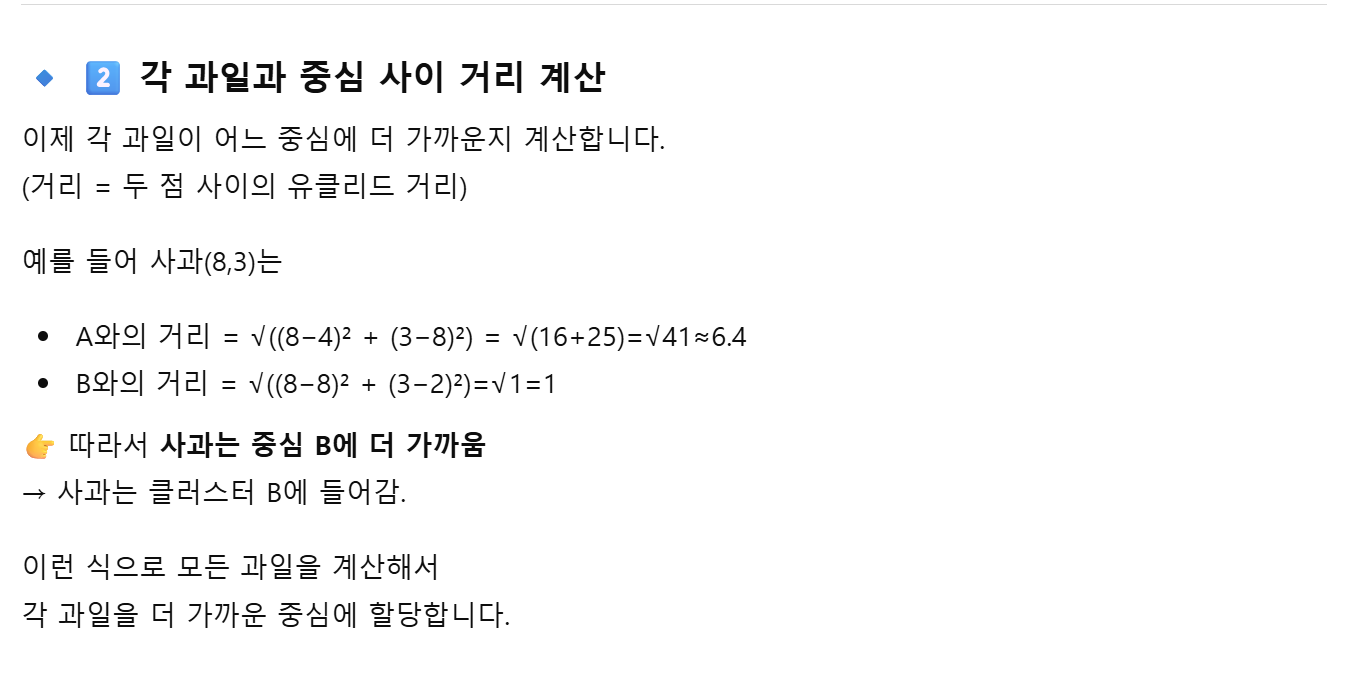
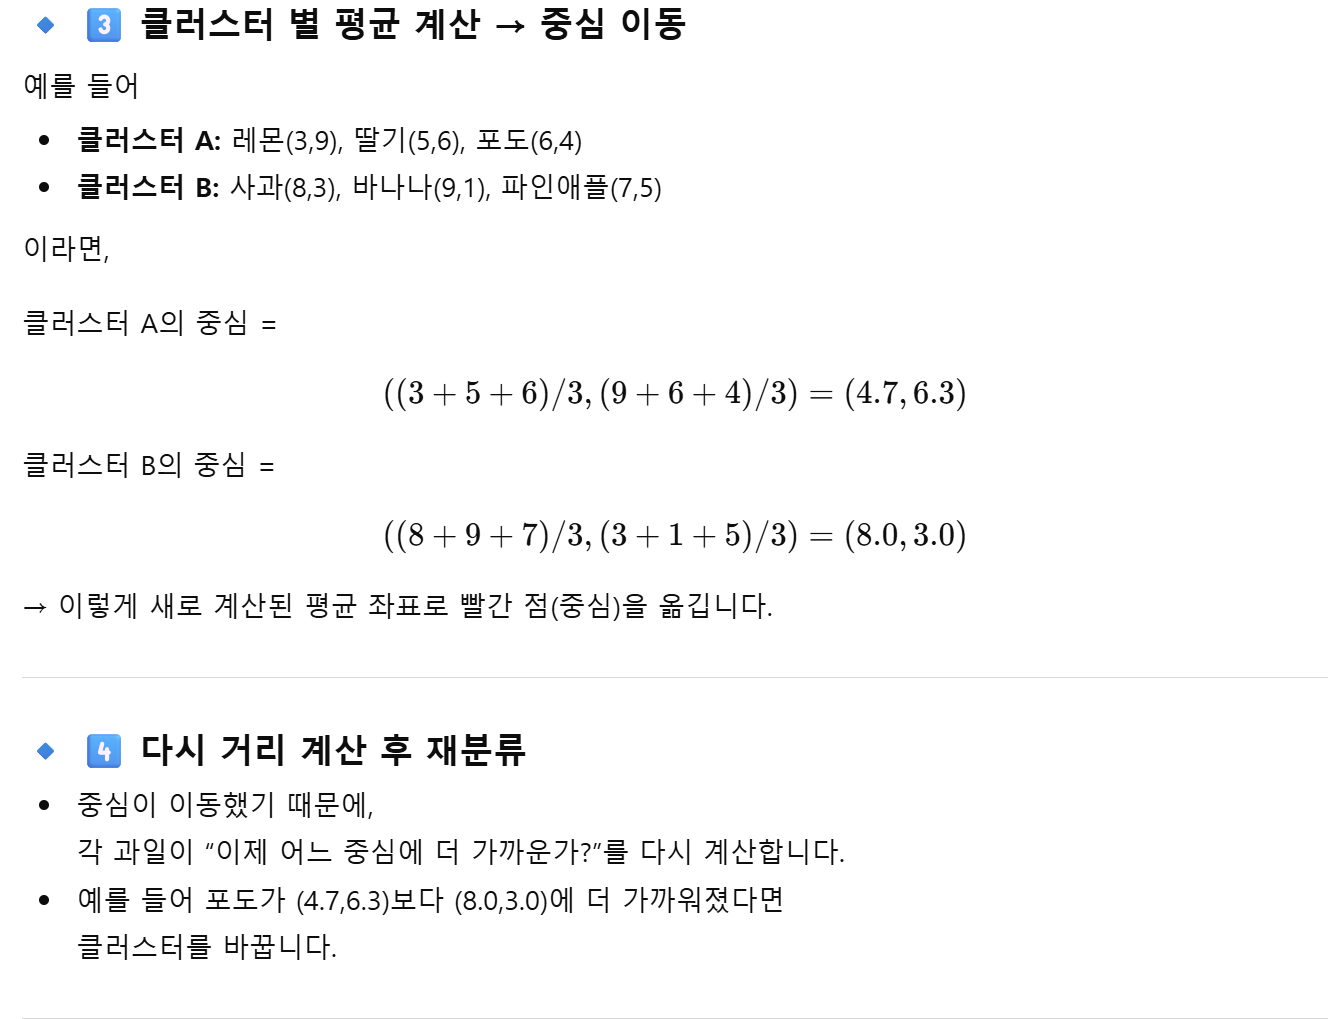
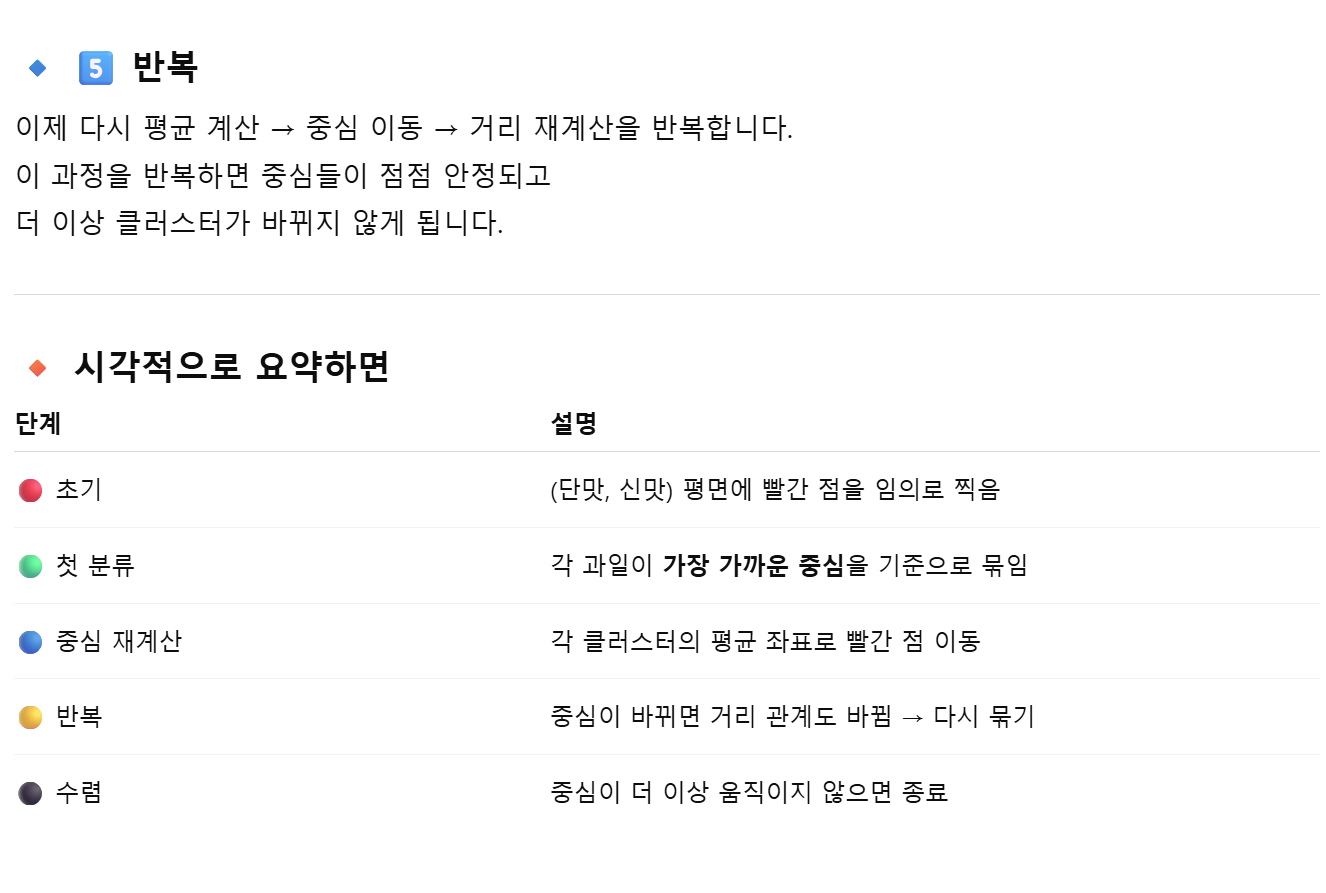

## 2. KMeans 클래스


In [6]:
#데이터 다시 불러오기
!wget https://bit.ly/fruits_300_data -o fruits_300.pny

In [7]:
import numpy as np 
fruits = np.load('fruits_300.npy') #npy 파일을 읽어 넘파이 배열을 준비
fruits_2d = fruits.reshape(-1, 100*100) #3차원 배열(샘플 개수, 너비, 높이） 을 2차원 배열(샘플 개수, 너비x 높이）로 변경 

In [26]:
import numpy as np
np.__version__

'2.0.1'

sklearn의 k-mean algorithm 은 sklern.cluster 모듈 아래 KMeans 클래스에 잇음

`n_cluster` = 클러스터 개수   

비지도 학습이므로 fit() 에  타깃 데이터를 사용하지 않음  
군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됨.  
labels_ 배열의 길이 = 샘플 개수  
n_cluster = 3 으로 설정한다면 labels_ 배열의 값은 0, 1, 2  중 하나  

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
print(km.labels_) #군집 결과 확인 

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


0, 1, 2 가 어떤 과일인지는 모르지만, 같은 종류들 끼리 묶어놓은 것 (클러스터 )
예를들면 클러스터 0 은 사과, 클러스터 1은 바나나, 클러스터 2는 파인애플  

In [10]:
print(np.unique(km.labels_, return_counts=True))
#0 클러스터 112개 1 클러스터 98개 2클러스터 90개 

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [11]:
#draw_fruits 함수 정의하기 
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)  # n은 샘플(이미지) 개수
    rows = int(np.ceil(n / 10))  # 한 줄에 10개씩, 행의 개수 계산, ceil = 올림처리 
    cols = n if rows < 2 else 10  # 한 줄이면 열 = n, 아니면 10개로 고정

    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols * ratio, rows * ratio), squeeze=False) #squeeze false 는 1행1열일 때도 2d 배열 유지하려고

    for i in range(rows): #모든 행
        for j in range(cols): #모든 열 돌면서 이미지 하나씩 그리기
            if i * 10 + j < n:  # n개까지만 그림
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')  # 흑백反전으로 이미지 표시
            axs[i, j].axis('off')  # 축 눈금 제거
    plt.show()


**불리언 인덱싱**
위에서 정의한 함수를 이용해서 레이블이 0인 과일 사진만 불러오기 위해서  
km.labels_ == 0 과 같이 쓰면 0인 것의 위치는 True, 그 외는 모두 False 가 된다.  
이렇게 불리언 배열을 사용해 원소를 선택할 수 있다.   

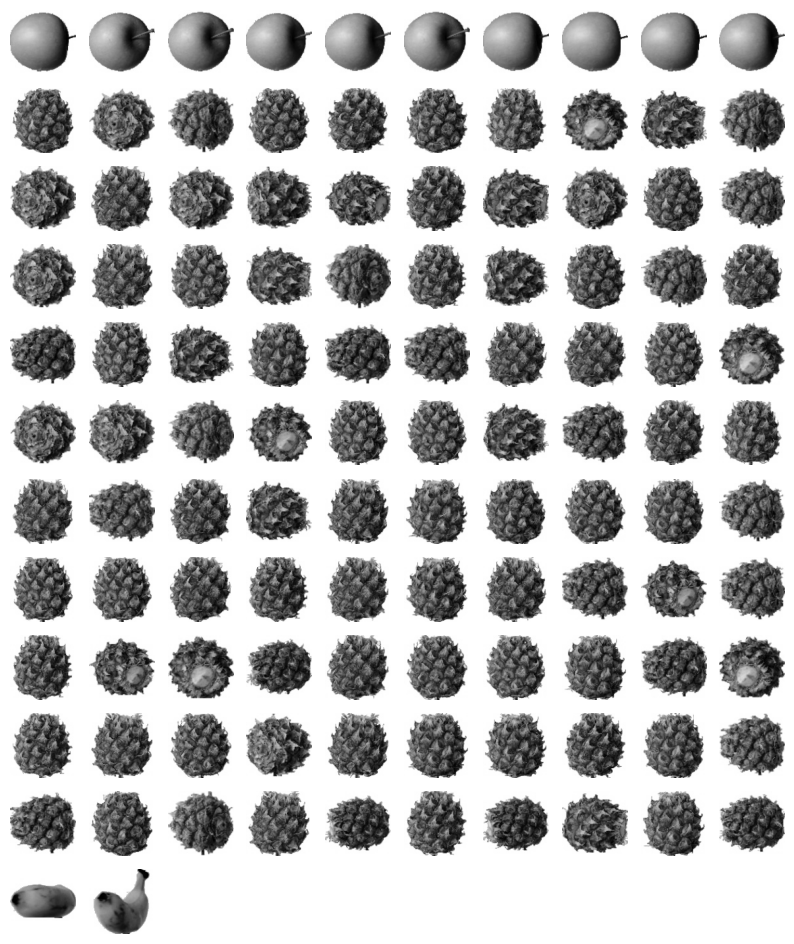

In [12]:
draw_fruits(fruits[km.labels_==0])

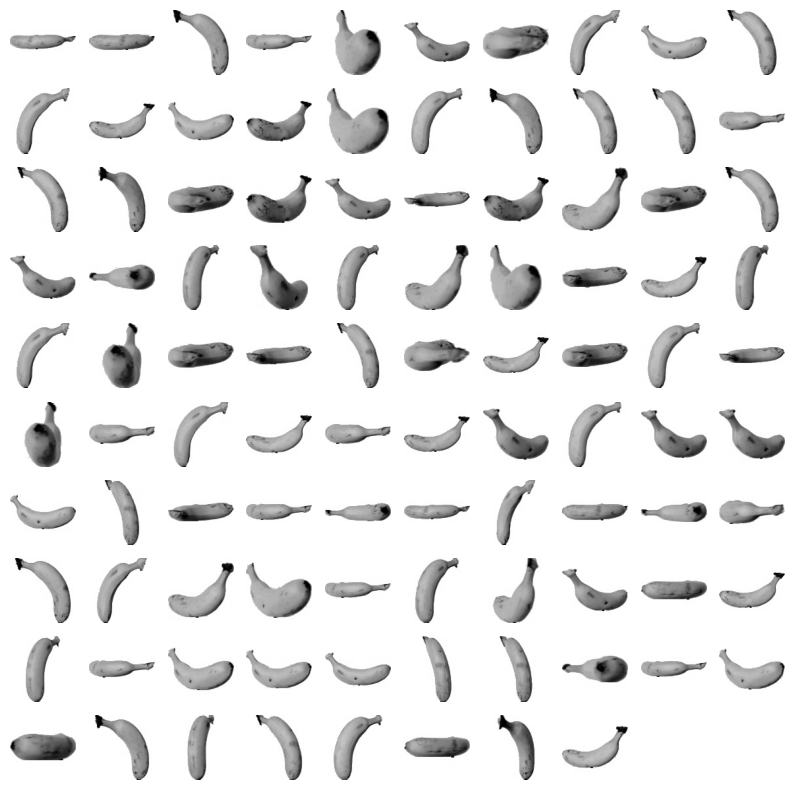

In [13]:
draw_fruits(fruits[km.labels_==1])

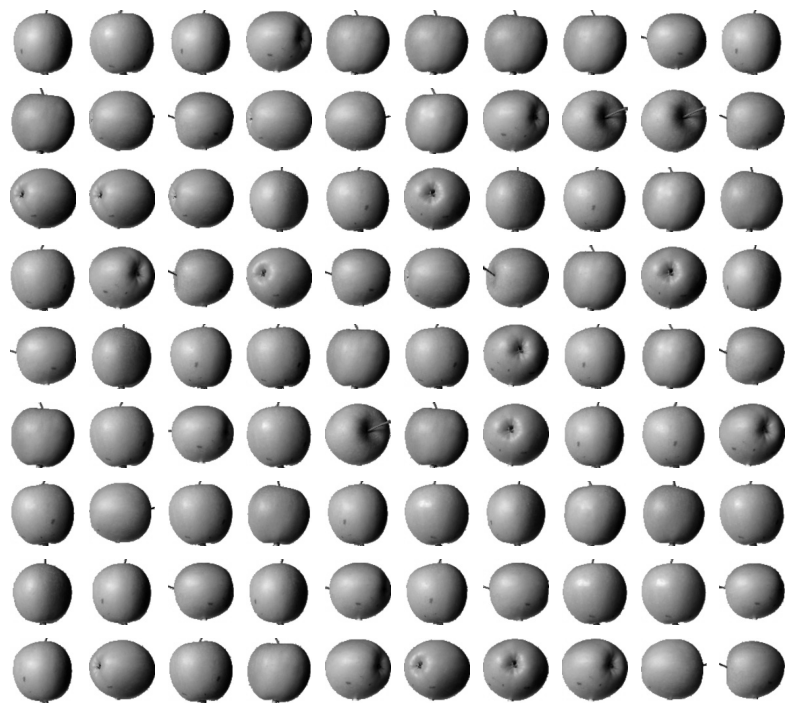

In [15]:
draw_fruits(fruits[km.labels_==2])

## 3. 클러스터 중심 
KMeans 클래스가 최종적을 ㅗ찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있음.  
이 배열은 fruits_2d샘플의 클러스터 중심  -> 이미지로 출력하려면 100 x 100 크기 2차원 배열로 다시 바꿔줘야 함  


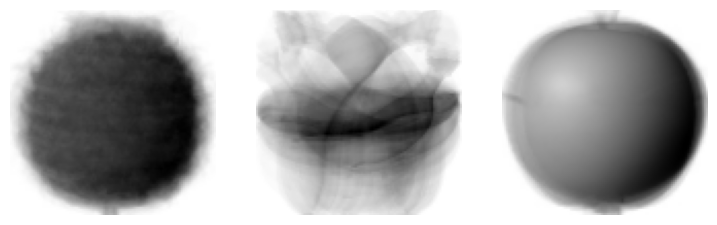

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)


KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 `transform()` 메서드를 가지고 있음  
> 참고, StandardScale 에서의 `transform()` 은 각 값을 (값-평균)/표준편차 로 바꿔주는 , 데이터의 스케일을 조정하는 역할  

`trnasfrom()` @KMeans   
각 샘플이 **각 클러스터 중심으로부터 얼마나 떨어져 있는지(거리)**를 계산

예:  

|샘플 |	클러스터0까지 거리|	클러스터1까지 거리|	클러스터2까지 거리   
|---|---|---|---|
|0번	|0.5	|3.1	|1.8  
|1번	|2.4	|0.8	|1.2  
|2번	|1.1	|1.5	|0.4   

→ 즉, transform()은 각 데이터가 각 클러스터 중심과 얼마나 가까운지를 수치로 표현  

In [18]:
#인덱스가 100인 샘플에 transform
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


|샘플| 인덱스	|클러스터 0 거리|	클러스터 1 거리|	클러스터 2 거리
|---|---|---|---|---|
|100|	3400.24|	8837.38|	5279.34


**<의미 해석>**

이 숫자는 유클리드 거리(Euclidean distance)   
즉,  
100번 과일 이미지(픽셀 10,000개짜리 벡터)가 각 클러스터 중심(빨간 점)에서 얼마나 떨어져 있는지를 수치로 나타냄  

3400.24 → 클러스터 0 중심까지의 거리  
8837.37 → 클러스터 1 중심까지의 거리  
5279.33 → 클러스터 2 중심까지의 거리   

**<가장 작은 값이 의미하는 것>**

이 중 가장 작은 거리 = 3400.24  
→ 따라서 이 샘플은 클러스터 0과 가장 가깝다  
→ 즉, KMeans는 이 이미지를 클러스터 0에 속한다고 판단합니다.  

이를 직접 확인할 수 있어요 👇  

print(km.labels_[100])  
 → 0  

In [19]:
print(km.predict(fruits_2d[100:101]))

[0]


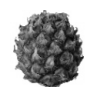

In [20]:
draw_fruits(fruits[100:101])

In [23]:
#k-mean 알고리즘이 최적화를 위해 몇번 반복햇는지는 n_iter_에 저장됨
print(km.n_iter_)

4


> “클러스터 중심을 특성 공학처럼 사용해 데이터셋을 저차원(이 경우에는 10,000에서 3으로 줄입니다)으로 변환할 수 있습니다.”  

**1️⃣ 배경: 원래 데이터 차원 = 10,000**
fruits_2d = fruits.reshape(-1, 100*100)  
👉 한 과일 이미지를 100×100 = 10,000개의 픽셀 값으로 표현했어요.  
즉, 특성(feature) = 10,000개 /  샘플 수 = 300개  
이건 고차원 데이터예요.  


**2️⃣ KMeans의 중심(centroid)**

KMeans를 n_clusters = 3 으로 학습하면  
“과일 이미지를 3개의 그룹(예: 사과, 바나나, 파인애플)”로 묶고  
각 그룹의 중심(centroid) 벡터를 계산합니다.  

각 중심(centroid)은 10,000개의 픽셀 평균값으로 구성됨  
즉, 각 중심도 10,000차원 벡터임  


**3️⃣ transform() 으로 변환하면?**

km.transform(X) 을 실행하면  
→ 각 샘플이 “3개의 중심까지의 거리”로 바뀝니다.  

즉,  
원래는 샘플 하나가 [x₁, x₂, x₃, ..., x₁₀₀₀₀] (1×10,000) 이었는데   
이제는 [거리_클러스터0, 거리_클러스터1, 거리_클러스터2]  
즉, (1×3) 벡터로 바뀌는 거예요.  


**4️⃣ “10000 → 3으로 줄인다”의 의미**

이제 명확하죠 👇

|변화|	설명
|---|---|
|원래: 10,000차원|	각 픽셀 밝기값으로 구성된 고차원 벡터
|변환 후: 3차원|	각 클러스터 중심까지의 거리로 구성된 벡터
|결과	|10,000개의 특성을 3개의 “거리” 특성으로 줄임

즉,  
“KMeans의 transform() 결과를 새로운 특성(feature)으로 쓰면,  
원래 10,000차원이었던 이미지를 3차원(거리 기반)으로 압축 표현할 수 있다”  
는 뜻입니다.  


**5️⃣ 이게 “특성공학(feature engineering)”처럼 쓰이는 이유**

원래 픽셀 단위(10,000차원)로 쓰면 계산 복잡도가 크고, 의미가 희미함  
대신 각 클러스터 중심까지의 거리 3개만으로 표현하면  
훨씬 단순한 특성 벡터로 변환됨  
“이 샘플은 어느 클러스터에 가까운가?”를 수치로 표현 가능  
다른 알고리즘(예: SVM, 로지스틱 회귀 등)에도 입력으로 쓸 수 있음  


**✅ 정리**
“10000에서 3으로 줄인다”는 말은,  
원래 10,000개의 픽셀 특성을  
KMeans의 3개 클러스터 중심까지의 거리 3개 값으로 표현한다는 뜻이에요.  

즉, KMeans의 transform()을 이용해  
고차원 데이터를 저차원(3차원) 특성 공간으로 압축한 것입니다.  

## 4. 최적의 k 찾기 

k-평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다.  
실제로는 몇개의 클러스터가 있는 지 알 수 없다.  

그렇다면, 어떻게 적절한 k 값을 찾을 수 있는가 ?  


### 방법 1. 엘보우 elbow 

**이너셔 inertia** 
> 모든 데이터가 자신이 속한 클러스터 중심까지의 거리 제곱합(sum of squared distances)
= 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값   

- 클러스터 내 점들이 중심에 가까울수록 → inertia_ 값이 작음  
- 점들이 흩어져 있을수록 → inertia_ 값이 큼  
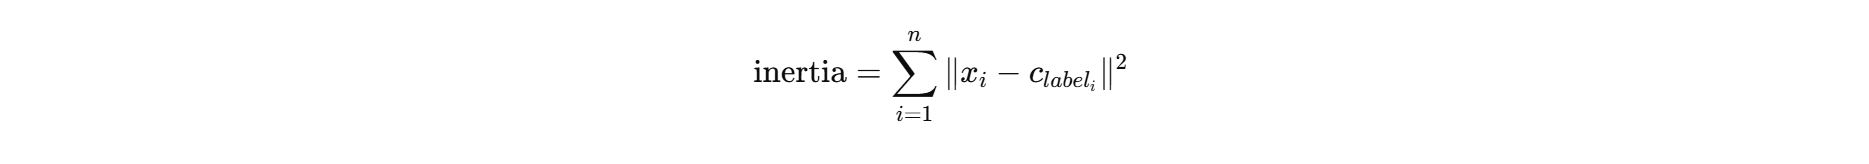

if 클러스터 개수 늘어나면 = 각 클러스터의 크기는 줄어듦 = 이너셔도 줄어듦  

따라서, 엘보우 방법은 클러스터 개수를 늘려가며 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법  

그래프로 그리면, 감소하는 속도가 꺽이는 지점이 있는데, 그 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않음.  
즉, 이너셔가 크게 줄어들지 않음.  

이 지점이 팔꿈치 모양이어서 엘보우 방법이라고 부름  
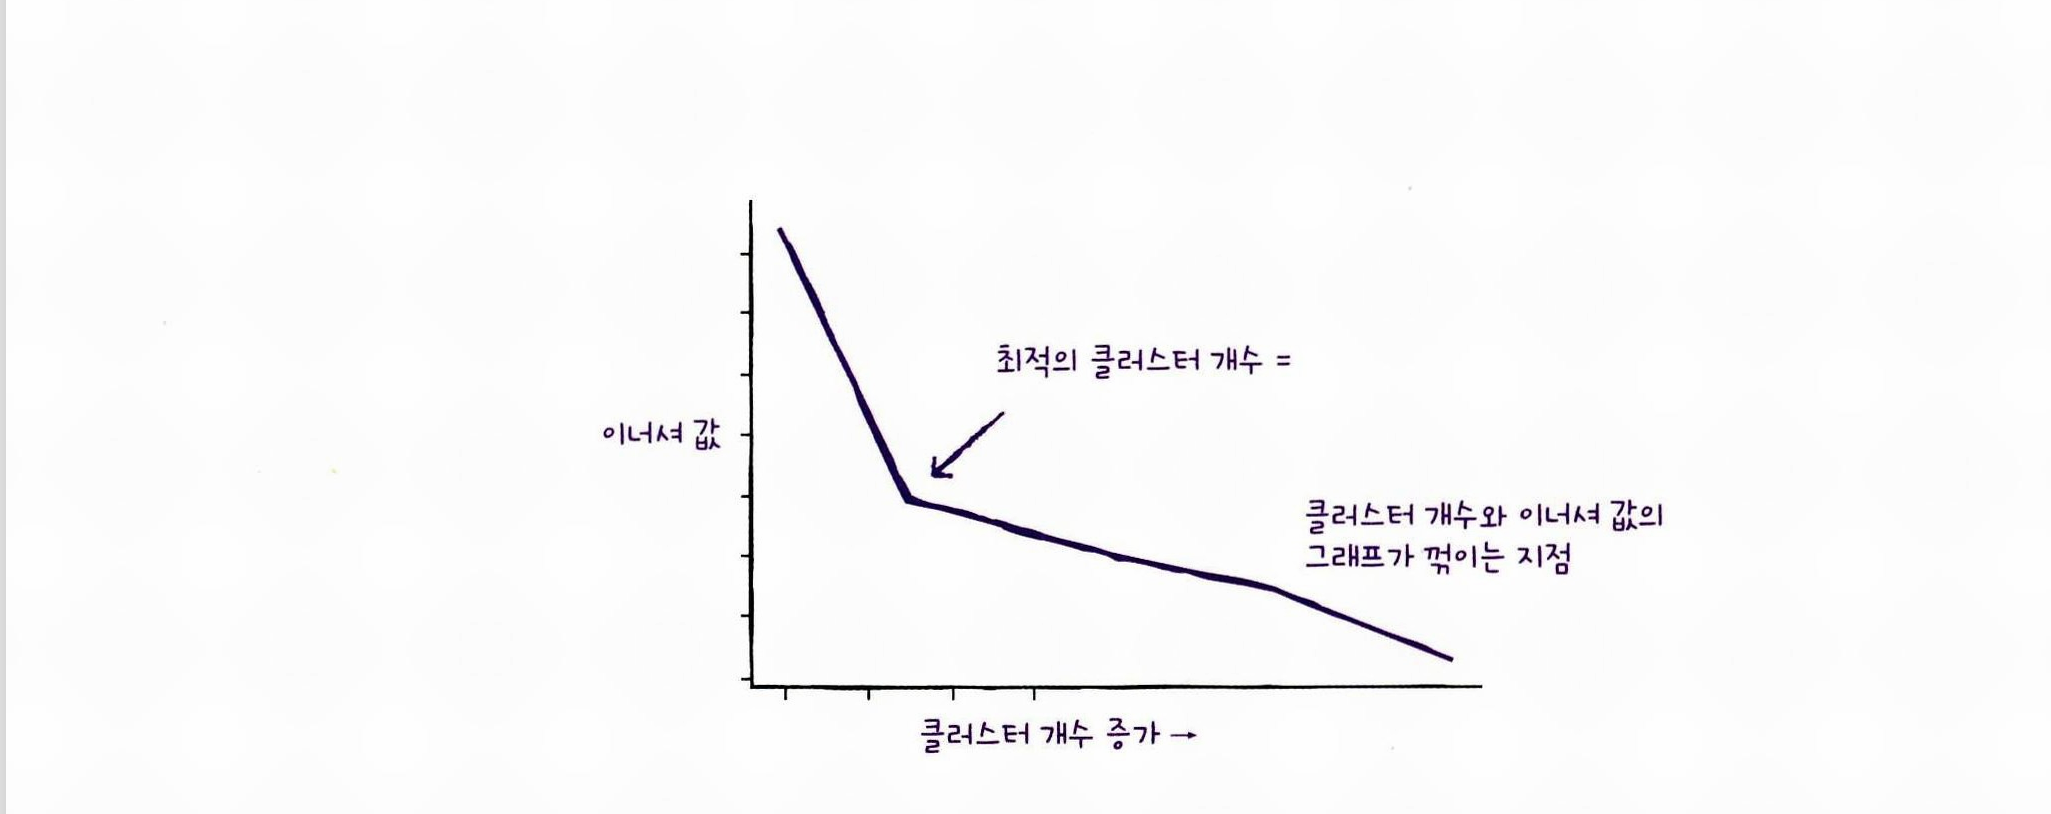

KMeans 클래스는 자동으로 이너셔를 계산해서 `inertia_` 속성으로 제공  

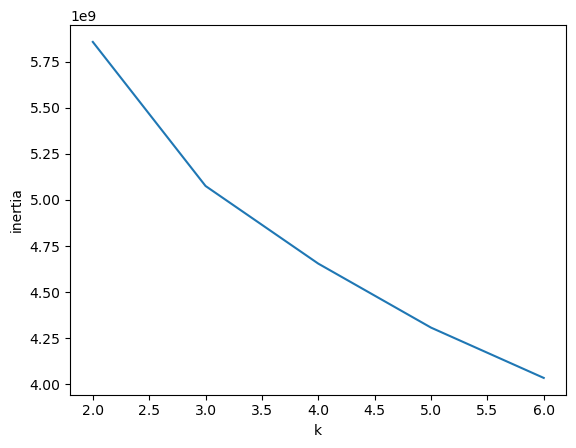

In [ ]:
inertia = [] #결과를 저장할 빈 리스트 생성

for k in range (2, 7): #클러스터 개수를 2,3,4,5,6 으로 바꿔가며 반복 
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    #n_clusters : 군집 개수 설정 / n_init='auto' : KMeans 초기화 방식을 자동선택 / random_state : 랜덤 시드 고정하여 재현성 확보
    km.fit(fruits_2d)
    inertia.append(km.inertia_) #학습된 모델의 inertia(클러스터 내 거리 제곱합)을 리스트에 추가 append 
    # [k=2일 때 inertia, k=3일 때 inertia, ..., k=6일 때 inertia] 이렇게 저장됨

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()